In [149]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.sentiment_analyzer import SentimentAnalyzer
import matplotlib.pyplot as plt
import nltk

In [151]:
df = pd.read_excel("../Data/DataWithNominalPrice/NewNewSentimentData.xlsx")

In [156]:
sid = SentimentIntensityAnalyzer()

In [163]:
df.head()

,Title,Content,PriceChange,ContentNoHTML,TitleNoHTML,TitleSentimentScore,ContentSentimentScore,ContentBins
2,Wall Street's most in-demand jobs for 2016,<!-- react-text: 385 -->Job cuts and shrinking...,1.123700,Job cuts and shrinking bonuses dominated headl...,Wall Street's most in-demand jobs for 2016,0.0000,0.9914,Very Positive
4,Why Bitcoin Matters,The most epochal financial transaction of this...,0.897336,The most epochal financial transaction of this...,Why Bitcoin Matters,0.0258,0.9892,Very Positive
5,My 2016 Tech Predictions,I&rsquo;ve been thinking about some of the coo...,0.897336,I’ve been thinking about some of the cool thin...,My 2016 Tech Predictions,0.0000,0.4767,Slightly Positive
7,Tech Trends of 2016,<strong>New Ways to Interact</strong><br/>One ...,-0.239863,New Ways to InteractOne of the best things abo...,Tech Trends of 2016,0.0000,0.9936,Very Positive
8,World's Largest Bitcoin Poker Freeroll to Acco...,"<span class=""xn-location"" itemprop=""contentLoc...",0.695038,"HONG KONG, Jan. 4, 2016 /PRNewswire/ -- Today ...",World's Largest Bitcoin Poker Freeroll to Acco...,0.0000,0.9966,Very Positive


In [162]:
df["ContentBins"] = df["ContentSentimentScore"].apply(sentimentMediumBins)

In [153]:
def getSentimentScore(row):
    ss = sid.polarity_scores(row)
    return ss["compound"]

In [161]:
def sentimentSmallBins (sentiment):
    if (sentiment > 0.6):
        return "Very Positive"
    elif (sentiment > 0.4 and sentiment < 0.6):
        return "Medium Positive"
    elif (sentiment > 0.2 and sentiment < 0.4):
        return "Slightly Positive"
    elif (sentiment < -0.6):
        return "Very Negative"
    elif (sentiment < -0.4 and sentiment > -0.6):
        return "Medium Negative"
    elif (sentiment < -0.2 and sentiment > -0.4):
        return "Slightly Negative"
    else:
        return "Neutral"

def sentimentMediumBins(sentiment):
    if (sentiment > 0.5):
        return "Very Positive"
    elif (sentiment < -0.5):
        return "Very Negative"
    elif (sentiment > 0.2 and sentiment < 0.51):
        return "Slightly Positive"
    elif (sentiment < -0.2 and sentiment > -0.51):
        return "Slightly Negative"
    else:
        return "Neutral"

def sentimentChange(sentiment):
    if (sentiment > 0.2):
        return "Positive"
    elif (sentiment < -0.2):
        return "Negative"
    else:
        return "Neutral"

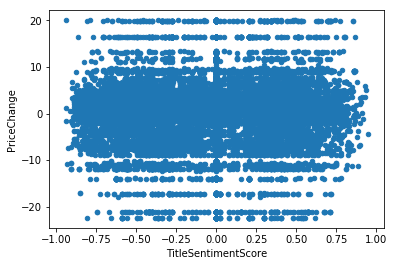

In [166]:
df.plot.scatter("TitleSentimentScore", "PriceChange")
plt.show()

In [ ]:
df["ContentScoreSmallLH"] = df["Content"].apply(simple_sentiment)

In [ ]:
df.head()

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_encoded = label_encoder.fit_transform(df["ContentSentimentSmall"])

In [48]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_encoded[:, None], df["ZeroBasedRealBinsPlus"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [102]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import preprocessing

# Organize our data
label_names = df.ZeroBasedRealBins.unique()
labels = df['ZeroBasedRealBins'].tolist()
feature_names = df.ContentSentimentSmall.unique()
features = df["ContentSentimentUD"].tolist()

le = preprocessing.LabelEncoder()
le.fit(label_names)
labels = le.transform(labels)
le.fit(feature_names)
features = np.array(le.transform(features)).reshape(-1,1)

print(np.shape(labels))
print(np.shape(features))
# Look at our data
print(label_names)
#print('Class label = ', labels[0])
print(feature_names)
#print(features[0])

# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
print(preds)

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

ValueError: y contains new labels: ['Negative' 'Positive']

In [12]:
distributionCount = pd.value_counts(df['ZeroBasedRealBinsPlus'].values, sort=True)
print(distributionCount)
distributionCount.plot(kind='bar')
plt.show()\

Positive    19520
Negative     9647
Neutral      1500
dtype: int64


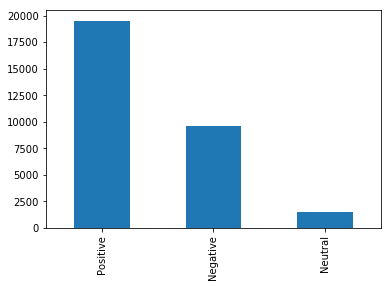

In [101]:
distributionCount = pd.value_counts(df['ContentSentimentUD'].values, sort=True)
print(distributionCount)
distributionCount.plot(kind='bar')
plt.show()\

In [125]:
writer = pd.ExcelWriter('../Data/DataReadyForClassifier/SentimentMasterData.xlsx', engine='xlsxwriter', options={'strings_to_urls': False})
df.to_excel(writer, 'Sheet1')
writer.save()

In [126]:
df.to_csv('../Data/DataReadyForClassifier/SentimentMasterData.csv')